<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Data_622_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4

### Exploratory Analysis and Essay


#### Assignment
  1. Choose a dataset
  You get to decide which dataset you want to work on. The data set must be different from the ones used in previous homeworks You can work on a problem from your job, or something you are interested in. You may also obtain a dataset from sites such as Kaggle, Data.Gov, Census Bureau, USGS or other open data portals.
  2. Select one of the methodologies studied in weeks 1-10, and another methodology from weeks 11-15 to apply in the new dataset selected.
  3. To complete this task:
  <ul>
    A. Describe the problem you are trying to solve.
    
    B. Describe your datases and what you did to prepare the data for analysis.
    
    C. Methodologies you used for analyzing the data
    
    D. What's the purpose of the analysis performed
    
    E. Make your conclusions from your analysis. Please be sure to address the business impact (it could be of any domain) of your solution.


#### Deliverable
  1. Your final presentation (essay or video) should include:
  <ul>
    A. The traditional R file or Python file and essay,
    
    B. An Essay (minimum 500 word document) or Video ( 5 to 8 minutes recording)

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
import random


warnings.filterwarnings("ignore")

### Data Source



The Heart Disease Prediction dataset used; will help showcase insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals, classified as either having or not having heart disease. The results are upon the gold standard in heart health assessment, the cardiac catheterizations. Each patient has 13 independent predictive variables which involves their age, sex, chest pain type, blood pressure, cholesterol levels, electrocardiogram(EKG) results, and etc. Using this dataset will help allows us enable the development of early preventative strategies and improving treatment by healthcare professionals beyond traditional medical methods.





The 15 columns being:

* Index: Patient ID
* Age:	The age of the patient
* Sex:	The gender of the patient
* Chest pain type: The type of chest pain experienced by the patient
* BP:	The patient's blood pressure level
* Cholesterol: The patient's cholesterol level
* FBS over 120:	The fasting blood sugar test results over 120 mg/dl
* EKG results:	The electrocardiogram results of the patient
* Max HR:	The maximum heart rate levels achieved during exercise testing.
* Exercise angina:	The angina experienced during exercise testing
* ST depression: The ST depression on an Electrocardiogram.
* Slope of ST: The slope of ST segment electrocardiogram readings
* Number of vessels fluro: The amount vessels seen in Fluoroscopy images
* Thallium: The Thallium Stress test findings


Output Variables
* Heart Disease: Whether or not the patient has been diagnosed with Heart Disease



[Data Source](https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Data%20624/Heart_Disease_Prediction.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [4]:
# Droping Index(Non-Predictor)
df.drop(columns=["index"], inplace=True)
df_filter = df.drop(columns=["Heart Disease"])

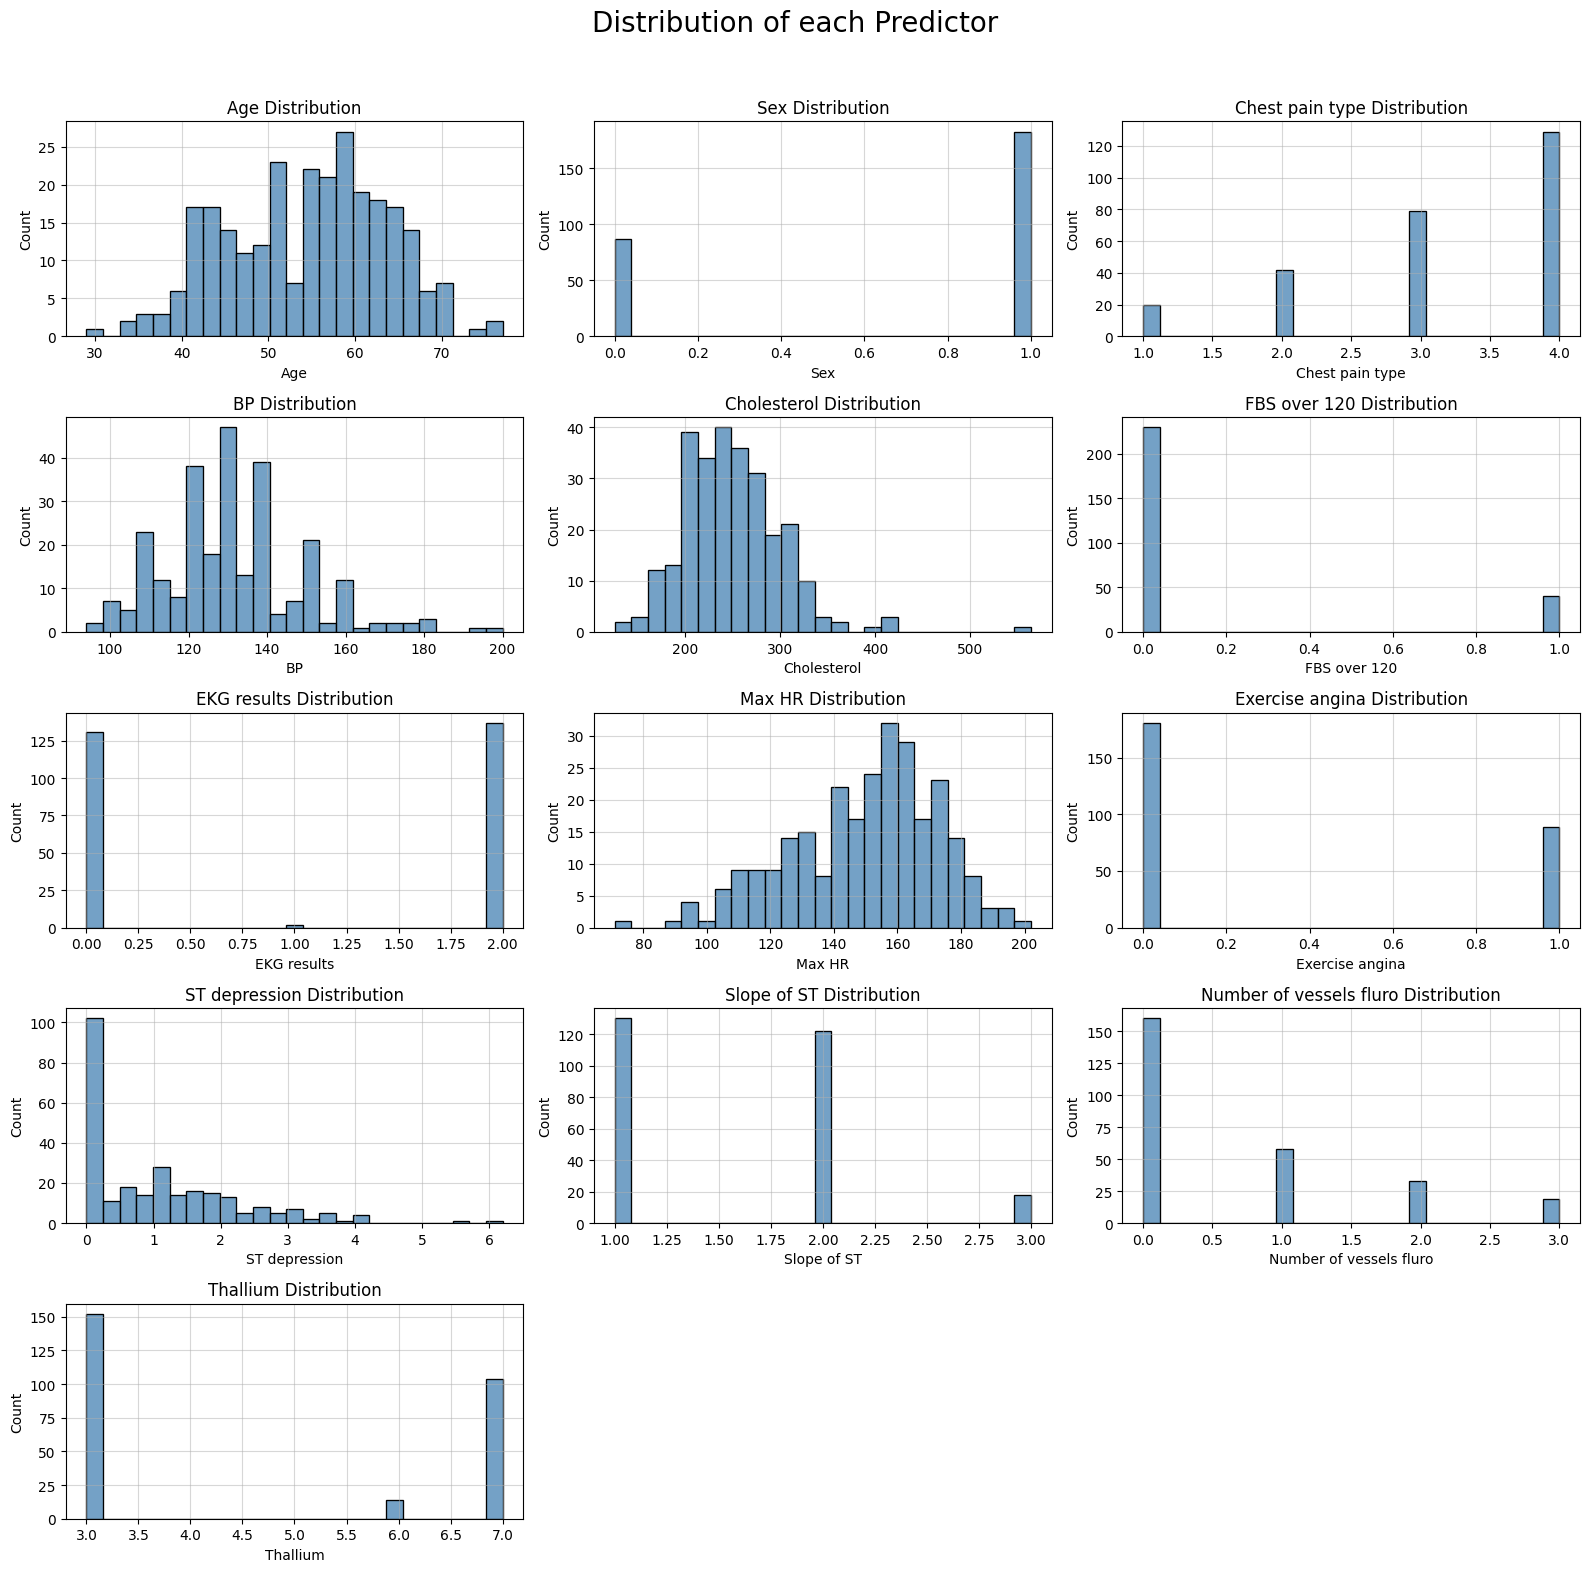

In [5]:
# Creating Grid
var_num = len(df_filter.columns)
col_num = 3
row_num = (var_num + col_num - 1) // col_num
fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=(16, 16))
axes = axes.flatten()

# Plot a histogram for each variable
for i, col in enumerate(df_filter.columns):
    sns.histplot(df_filter[col], bins=25, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(alpha=0.5)

# Removing extra subplots
for j in range(var_num, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of each Predictor", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

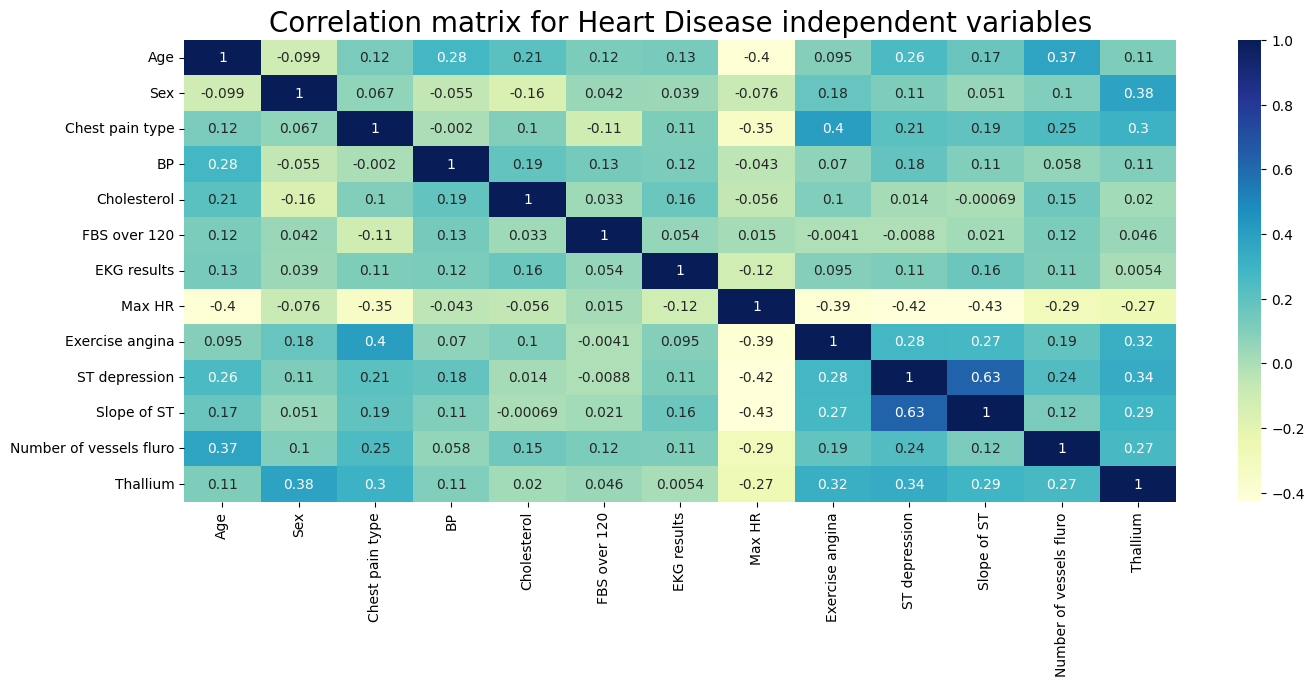

In [6]:
# Correlation Matrix
corr_matrix = df_filter.corr(method="spearman")
plt.figure(figsize=[16,6])
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix for Heart Disease independent variables", fontsize=20)
plt.show()

#### Methodology 1: Random Forest

In [7]:
# Split Data for Models
x = df.drop(columns=["Heart Disease"])
y = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=17)

In [8]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RandomForestClassifier
rfc = RandomForestClassifier(random_state=17)
rfc.fit(X_train, y_train)

# Fit RandomForestClassifier
sfm = SelectFromModel(rfc)
sfm.fit(X_train, y_train)

# Get the names of the columns for the selected features
select_feature = sfm.get_support(indices=True)
select_col = x.columns[select_feature]
n_features = len(select_col)
rfc_y_pred = rfc.predict(X_test)

print(f"Number of features: {n_features}")
print("")
print(f"Feature names: {list(select_col)}")
print("")



# Prediction
print("Predictions:", rfc_y_pred)
print("")
# Accuracy
accuracy = accuracy_score(y_test, rfc_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Number of features: 7

Feature names: ['Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium']

Predictions: [0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]

Accuracy: 0.78


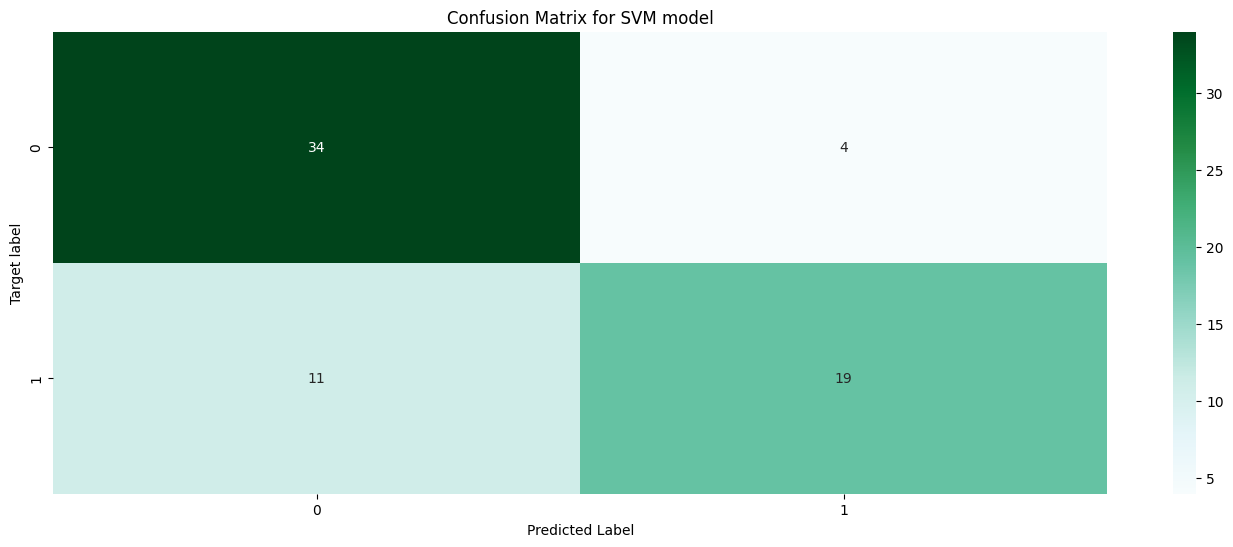

'              precision    recall  f1-score   support\n\n           0       0.76      0.89      0.82        38\n           1       0.83      0.63      0.72        30\n\n    accuracy                           0.78        68\n   macro avg       0.79      0.76      0.77        68\nweighted avg       0.79      0.78      0.77        68\n'

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, rfc_y_pred)

# Confusion matrix Heatmap
plt.figure(figsize=[17,6])
sns.heatmap(cm, annot=True, fmt="g", cmap='BuGn')
plt.xlabel("Predicted Label")
plt.ylabel("Target label")
plt.title("Confusion Matrix for SVM model")
plt.show()

# Classification Report
classification_report(y_test, rfc_y_pred)

#### Methodology 2: Neural Network

In [10]:
# Set Seed
random.seed(17)

# Transform the training and testing sets to selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Neural Network model
model = Sequential()
model.add(Dense(16, input_dim=n_features, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_selected, y_train, epochs=50, batch_size=10, verbose=1)
nn_y_pred = (model.predict(X_test_selected) > 0.5).astype("int32")

print("")
# Accuracy
accuracy = accuracy_score(y_test, nn_y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

Epoch 1/50
21/21 [==============================] - 4s 9ms/step - loss: 0.7058 - accuracy: 0.5792
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6495 - accuracy: 0.6535
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6064 - accuracy: 0.7030
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5694 - accuracy: 0.7426
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5370 - accuracy: 0.7574
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5105 - accuracy: 0.7723
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7822
Epoch 8/50
21/21 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.7921
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.4514 - accuracy: 0.7970
Epoch 10/50
21/21 [==============================] - 0s 8ms/step - loss: 0.4376 - accuracy: 0.8069
Epoch 11/50
21/21 [

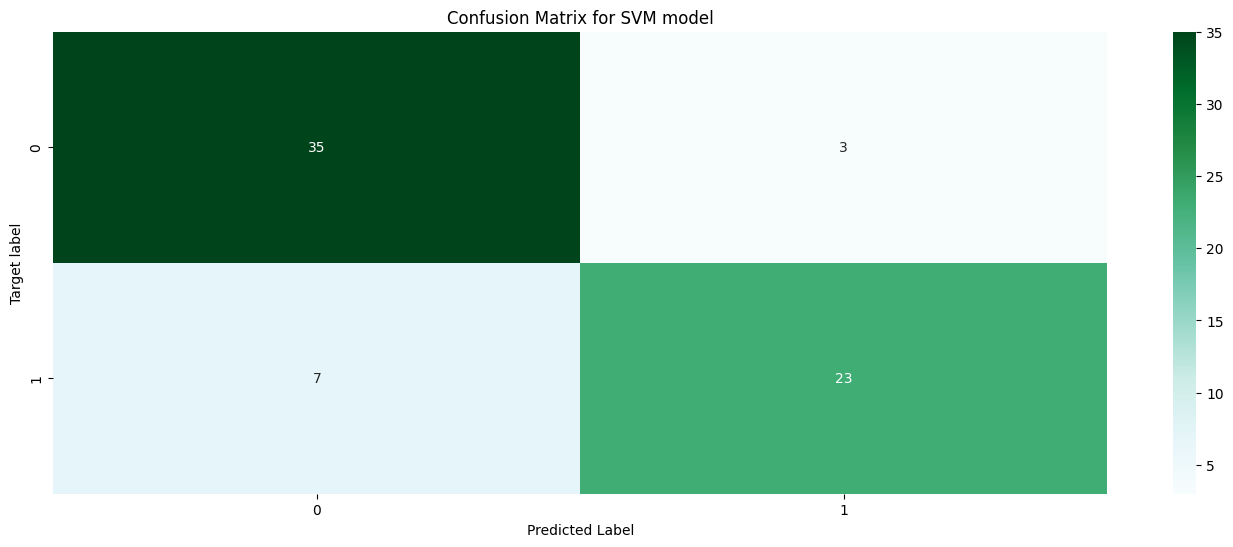

'              precision    recall  f1-score   support\n\n           0       0.83      0.92      0.88        38\n           1       0.88      0.77      0.82        30\n\n    accuracy                           0.85        68\n   macro avg       0.86      0.84      0.85        68\nweighted avg       0.86      0.85      0.85        68\n'

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, nn_y_pred)

#Confusion matrix Heatmap
plt.figure(figsize=[17,6])
sns.heatmap(cm, annot=True, fmt="g", cmap='BuGn')
plt.xlabel("Predicted Label")
plt.ylabel("Target label")
plt.title("Confusion Matrix for SVM model")
plt.show()

# Classification Report
print("")
classification_report(y_test, nn_y_pred)

#### Methodology 3: Support Vector Machine

In [12]:
# SVM classifier
svc = SVC(random_state=17)
svc.fit(X_train, y_train)

# Predictions
svc_y_pred = svc.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, svc_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


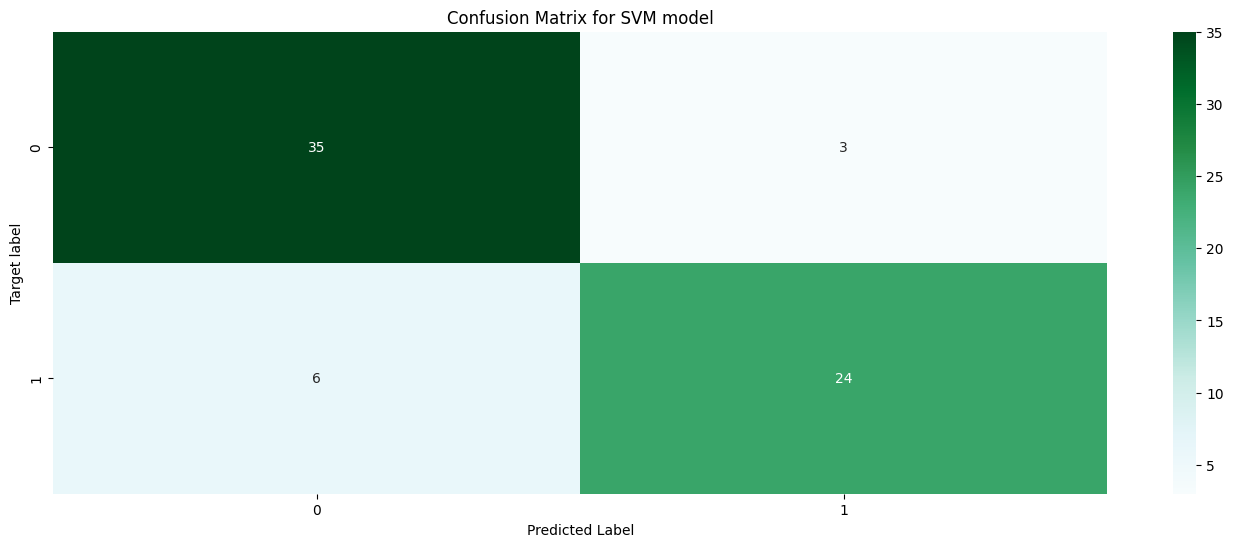

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.89        38\n           1       0.89      0.80      0.84        30\n\n    accuracy                           0.87        68\n   macro avg       0.87      0.86      0.86        68\nweighted avg       0.87      0.87      0.87        68\n'

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, svc_y_pred)

# Confusion matrix heatmap
plt.figure(figsize=[17,6])
sns.heatmap(cm, annot=True, fmt="g", cmap='BuGn')
plt.xlabel("Predicted Label")
plt.ylabel("Target label")
plt.title("Confusion Matrix for SVM model")
plt.show()

# Classification Report
classification_report(y_test, svc_y_pred)

### Discussion



    A. Describe the problem you are trying to solve.
The problem I am trying to solve is finding a way to predict early signs of cardiovascular problems. The cardiovascular problems would include heart failure or stoke, predicting these outcomes will hopefully be done by analyzing different clinical variables. By understanding the interactions between these variables, my goal will be to identify individuals at a higher risk as soon as possible. This early identification will help enable the development of preventative strategies and enhances different treatment options. With it ultimately improving the patient's health and reducing the chance of severe cardiovascular problems.

    B. Describe your datases and what you did to prepare the data for analysis.
This dataset is composed of 270 individual case studies that have been classified; as either having or not having heart disease. That metric is determined based on the cardiac catheterization results which is the gold standard for heart health assessment. Each patient is described by 13 independent predictive variables, including examples such as age, sex, chest pain type, blood pressure measurements, cholesterol levels, and many more. These variables will help provide a comprehensive view of each patient's cardiovascular health as well as identify any risk factors. Using this data we can help formulate different basis for predictive analysis on heart disease. For the data, there was only a few steps of preparation that was done to the original data set. First thing that was done is filtering out the index column since there is not a use for it. The only types of columns or variables we want are the predictors and the output variable. The next thing we do is convert the data in the column `Heart Disease`. The reason why we do this is to convert the data type from a string into an int value of 1 or 0 depending on the data being "Presence" or "Absence". This is also our output value so it can't be in string as we are doing the prediction on if heart disease is prevalent. After the data is then scaled with `StandardScaler` which helps makes the data have a zero mean and unit variance. The purpose of this was to help allow for easier comparison when determining the importance of each feature relative to the `Heart Disease` column. Finally for the first prediction model, we did feature selection to determine which of the features are actual important which the purpose of help reducing the dimensionality of the data set.

    C. Methodologies you used for analyzing the data
The 3 different types of methodologies that were used in order to analyse this data were: Random Forest(RF), Support Vector Machine(SVM), and Neural Networks(NN). As these 3 are super prevalent within the industry, I thought it would be best to utilize each of them to determine which one would work best in this data set. The Support Vector Machine classifier emerged as the best performing model with the highest accuracy of 0.87. To breakdown the accuracy of the models in terms of precision, recall, and F1-score. We can see that SVM consistently outperformed the other models for both classes. Specifically, SVM had the highest precision for both class 0 and class 1 with a rate of 0.85 and 0.89 respectively. This can indicate that SVM was able to correctly identify the predictions postively at a higher rate than Random Forest or Neural Network. Neural Network was the 2nd best performing model with an accuracy of 0.85. When we compare NN to SVM we can see that NN's recall for class 1 was slightly lower with a value of 0.77 compared to the SVM's 0.80. This indicates that NN missed more positive cases than SVM. The last classifier that was used was Random Forest classifier which was the least effective model with an accuracy of 0.78. RF was lower on every metric when compared to SVM and NN for precision, recall and F1-Score.

    D. What's the purpose of the analysis performed
The purpose of this analysis is to explore the relationships between different clinical variable and their impact on an individual's risk of heart diseases. As we conduct this analysis, the goal is to help uncover some patterns and insights that can help identify individuals that are at high risk early. This knowledge is impactful since knowing different patterns of heart disease will help enable healthcare professionals to implement preventative measures and treatments.

    E. Make your conclusions from your analysis. Please be sure to address the business impact (it could be of any domain) of your solution.

For business impact of my analysis, I see 3 different industries potentially utilizing this data being: Health Care Providers, Insurance Companies, and Pharmaceutical Companies.

For Health Care Providers, by detecting cardiovascular problems early, they can improve patient's health. As the early detection means more time is available in order to help implement different prevention tactics and treatment plans, which will hopefully reduce the chance of a severe cardiovascular problem. As this approach not only promotes patient health but also helps preventative care as this could help potentially lower the need for more costly treatments and save money in the long run. Furthermore with accurate prediction it will also help enable better resource allocation, ensure that high-risk patients receive the needed care and resources, and finally optimize utilization of the healthcare facilities and staff.

For Insurance Companies, they can leverage the analysis to upgrade their risk assessment process. As if they were able to accurately identify high-risk individuals; the insurers can help price health insurance more accurately. Therefore helping reduce the financial risk associated with covering these people. Another thing predictive analysis can do is help offer personalized wellness programs to individuals that would be identified as high risk. The insurer can hopefully increase coverage to better health risk mitigators within their coverage to promote a healthier lifestyle changes which would lead to healthier clients and lower claims.

Lastly, Pharmaceutical Companies can benefit from the analysis provided by predictive models in different ways. Their main focus would be to understand, Which variables are most predictive of cardiovascular issues?. Knowing this can help guide them to develop drugs that address the most impactful risk factors, which would lead to more effective treatments. Another benefit this analysis can do for pharmaceuticals is to help identify which candidates are most suitable for clinical trials to help ensure that the individuals that benefit the most would be apart of the trials.
